In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('AB_NYC_2019.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [37]:
df.drop(['id','name','host_name','last_review'], axis=1, inplace=True)

In [5]:
df.isnull().sum()

name                                 16
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
df.fillna({'reviews_per_month':0}, inplace=True)
#check
df.reviews_per_month.isnull().sum()

0

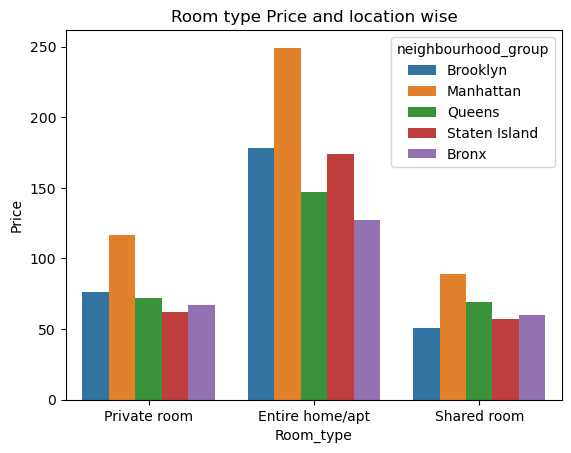

In [7]:
sns.barplot(x = df['room_type'],y=df['price'],errorbar=None,hue=df['neighbourhood_group'])
plt.title('Room type Price and location wise')
plt.xlabel('Room_type')
plt.ylabel('Price')
plt.show()

Text(0, 0.5, 'number_of_reviews')

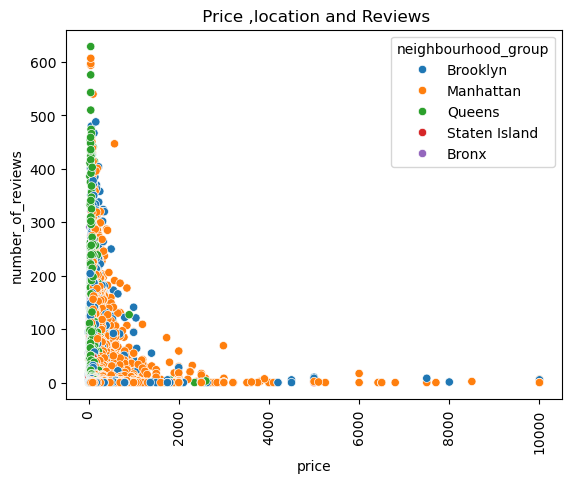

In [8]:
sns.scatterplot(x = df['price'],y=df['number_of_reviews'], c ='pink',hue=df["neighbourhood_group"])
plt.xticks(rotation=90) 
plt.title(' Price ,location and Reviews')
plt.xlabel('price')
plt.ylabel('number_of_reviews')

In [9]:
citywise_property=df.groupby('neighbourhood_group')['calculated_host_listings_count'].sum()
citywise_property

neighbourhood_group
Bronx              2437
Brooklyn          45925
Manhattan        277073
Queens            23005
Staten Island       865
Name: calculated_host_listings_count, dtype: int64

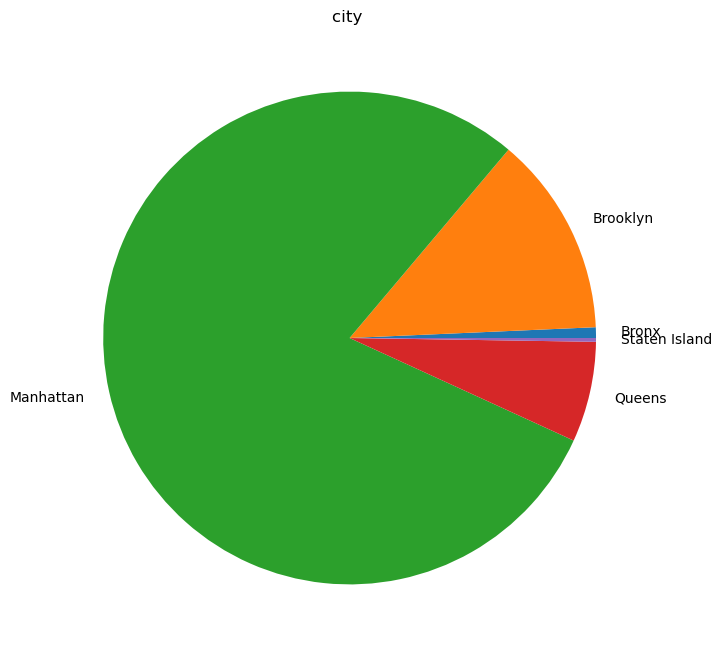

In [10]:
plt.figure(figsize = (8, 8))

plt.pie(x = citywise_property.values, labels = citywise_property.index)
plt.title("city ")
plt.show()

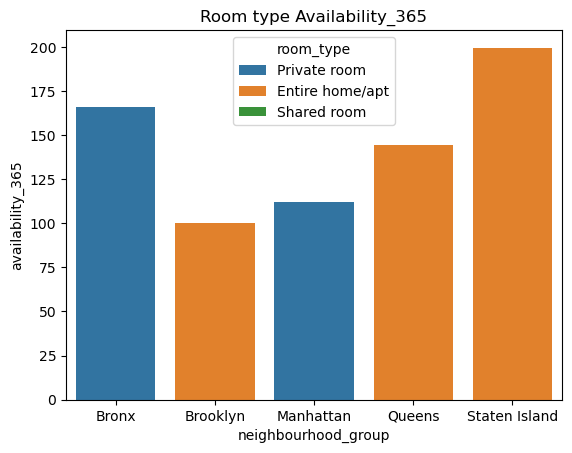

In [11]:
availability=df.groupby('neighbourhood_group')['availability_365'].mean().reset_index()

sns.barplot(data=availability,
            x='neighbourhood_group',
            y='availability_365',
            hue=df['room_type']);
plt.title('Room type Availability_365');

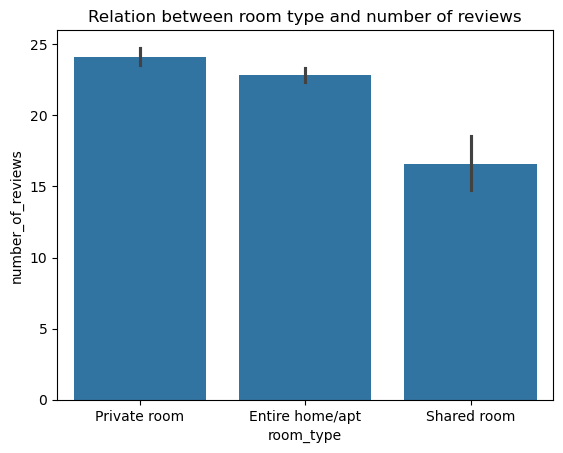

In [12]:
sns.barplot(data=df,
            x='room_type',
            y='number_of_reviews');
plt.title('Relation between room type and number of reviews');

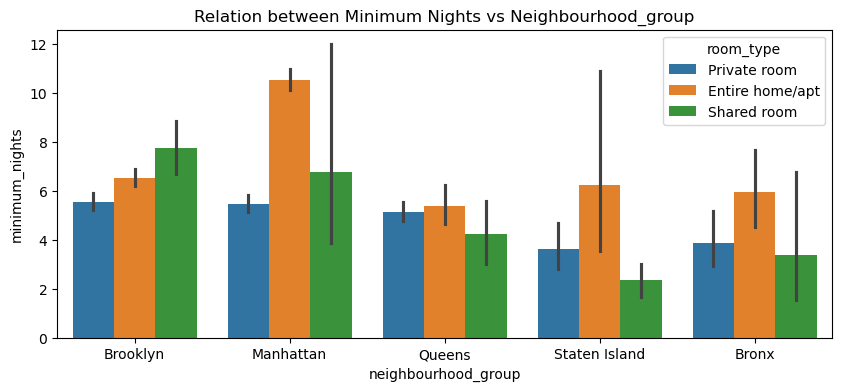

In [13]:
plt.figure(figsize=[10,4])
sns.barplot(x=df['neighbourhood_group'],
           y=df['minimum_nights'],
           hue=df['room_type']);
plt.title('Relation between Minimum Nights vs Neighbourhood_group');

Text(0.5, 1.0, 'Density and distribution of prices for each neighbourhood')

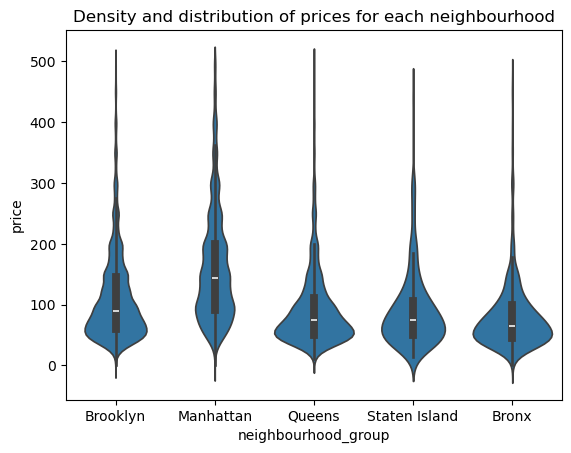

In [14]:
data=df[df.price < 500]
sns.violinplot(data, x = "neighbourhood_group", y = "price")
plt.title("Density and distribution of prices for each neighbourhood")

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

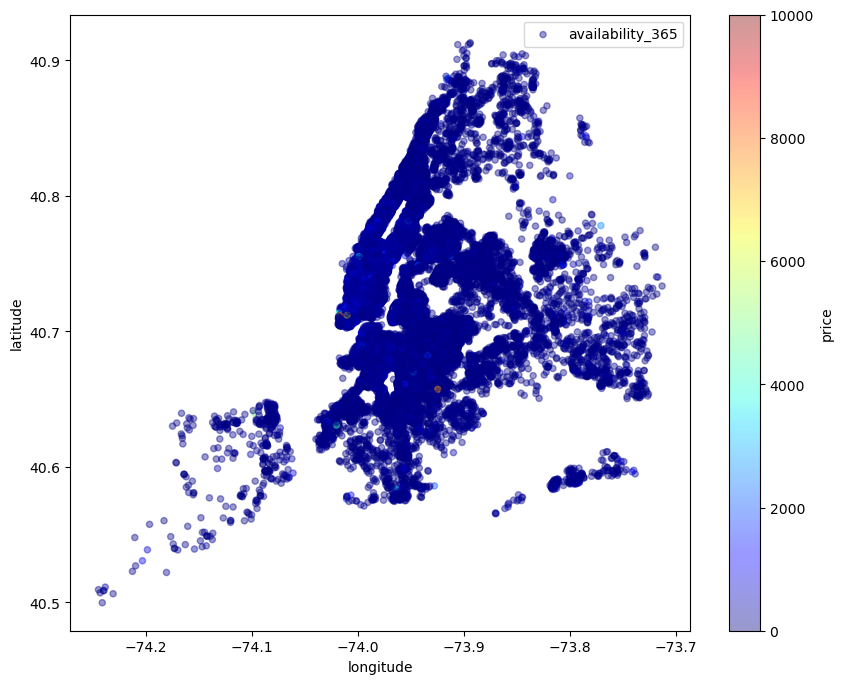

In [15]:
df.plot(kind = "scatter", x = "longitude", y = "latitude", label = "availability_365", c = "price", cmap = plt.get_cmap("jet"), colorbar = True, alpha = 0.4, figsize = (10, 8))
plt.legend

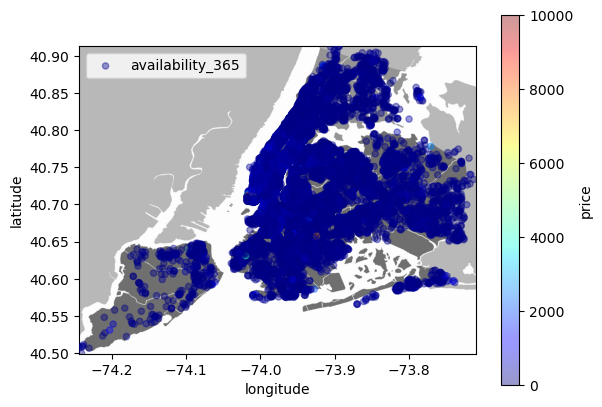

In [16]:
from PIL import Image
#scaling the image based on the latitude and longitude max and mins for proper output
nyc_map = Image.open("New_York_City_.png")
plt.imshow(nyc_map, zorder = 0, extent = [-74.244, -73.710, 40.499,40.913])
ax=plt.gca()

#using scatterplot again
df.plot(kind = "scatter", x = "longitude", y = "latitude", label = "availability_365", c = "price", ax = ax, cmap = plt.get_cmap("jet"), colorbar = True, alpha = 0.4, zorder = 5)
plt.legend()
plt.show()

In [22]:
df.isnull().sum()
df.dropna(how='any',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38821 non-null  int64  
 1   name                            38821 non-null  object 
 2   host_id                         38821 non-null  int64  
 3   host_name                       38821 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   latitude                        38821 non-null  float64
 7   longitude                       38821 non-null  float64
 8   room_type                       38821 non-null  object 
 9   price                           38821 non-null  int64  
 10  minimum_nights                  38821 non-null  int64  
 11  number_of_reviews               38821 non-null  int64  
 12  last_review                     38821

In [29]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNetCV
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import RobustScaler

In [40]:
dataset_onehot = pd.get_dummies(df, columns=['neighbourhood_group', 'neighbourhood', 'room_type'], prefix=['ng', 'nh', 'rt'], drop_first=True)

# Split data into features (X) and target variable (Y)
X = dataset_onehot.drop(['price'], axis=1)
Y = dataset_onehot['price']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [41]:
print(x_train.dtypes)
x_train = pd.get_dummies(x_train, drop_first=True)


host_id                int64
latitude             float64
longitude            float64
minimum_nights         int64
number_of_reviews      int64
                      ...   
nh_Woodhaven            bool
nh_Woodlawn             bool
nh_Woodside             bool
rt_Private room         bool
rt_Shared room          bool
Length: 231, dtype: object


In [42]:
regression_model = LinearRegression().fit(x_train, y_train)

# Calculate R-squared value
r_squared = regression_model.score(x_train, y_train)

# Predict using the model
y_pred = regression_model.predict(x_test)

# Calculate RMSE
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [43]:
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(x_train, y_train)

# Calculate RMSE for Lasso model
y_pred_lasso = lasso_model.predict(x_test)
rmse_lasso = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso))

# Display Lasso model coefficients
lasso_coefficients = pd.DataFrame(columns=["Variable", "Coefficient"])
lasso_coefficients["Variable"] = x_train.columns
lasso_coefficients["Coefficient"] = lasso_model.coef_
lasso_coefficients_sorted = lasso_coefficients.sort_values("Coefficient")

In [44]:
random_forest_model = RandomForestRegressor(n_estimators=30)
random_forest_model.fit(x_train, y_train)

# Calculate R-squared for Random Forest model
r_squared_rf = random_forest_model.score(x_train, y_train)

# Predict using Random Forest model
y_pred_rf = random_forest_model.predict(x_test)

# Calculate RMSE for Random Forest model
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))

In [45]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Create a Gradient Boosting Regression model
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

# Fit the model to your training data
gradient_boosting_model.fit(x_train, y_train)

# Predict using the Gradient Boosting Regression model
y_pred_gradient_boosting = gradient_boosting_model.predict(x_test)

# Calculate R-squared for Gradient Boosting Regression
r2_gradient_boosting = r2_score(y_test, y_pred_gradient_boosting)

# Calculate RMSE for Gradient Boosting Regression
rmse_gradient_boosting = np.sqrt(mean_squared_error(y_test, y_pred_gradient_boosting))


In [46]:
import xgboost as xgb

# Create an XGBoost model
xgboost_model = xgb.XGBRegressor(n_estimators=100, max_depth=3)  # You can adjust the hyperparameters

# Fit the XGBoost model to your training data
xgboost_model.fit(x_train, y_train)

# Predict using the XGBoost model
y_pred_xgboost = xgboost_model.predict(x_test)

# Calculate R-squared for XGBoost
r2_xgboost = xgboost_model.score(x_test, y_test)

# Calculate RMSE for XGBoost
rmse_xgboost = np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgboost))

In [47]:
model_scores_data = [
    {"Model": "Linear Regression", "R-squared": r_squared, "RMSE": rmse},
    {"Model": "Lasso Regression", "R-squared": lasso_model.score(x_train, y_train), "RMSE": rmse_lasso},
    {"Model": "Random Forest Regression", "R-squared": r_squared_rf, "RMSE": rmse_rf},
    {"Model": "XGBoost", "R-squared": r2_xgboost, "RMSE": rmse_xgboost},
    {"Model": "Gradient Boosting", "R-squared": r2_gradient_boosting, "RMSE": rmse_gradient_boosting}
]

# Create a DataFrame from the list of dictionaries
model_scores = pd.DataFrame(model_scores_data)

# Display the DataFrame
print(model_scores)

                      Model  R-squared        RMSE
0         Linear Regression   0.133884  166.970933
1          Lasso Regression   0.133167  166.872970
2  Random Forest Regression   0.865464  172.106822
3                   XGBoost   0.030329  180.101673
4         Gradient Boosting  -0.097580  191.612439
